In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [280]:
refugees_df = pd.read_csv('../data/refugees.csv', skipfooter=4, engine='python')
refugees_df.head()



,Country or territory of asylum or residence,Country or territory of origin,Year,Refugees*,Refugees assisted by UNHCR,Total refugees and people in refugee-like situations**,Total refugees and people in refugee-like situations assisted by UNHCR
0,Afghanistan,Iran (Islamic Rep. of),2021,38,38,38,38
1,Afghanistan,Pakistan,2021,72188,123,72188,123
2,Albania,China,2021,14,0,14,0
3,Albania,Egypt,2021,5,0,5,0
4,Albania,Iraq,2021,5,0,5,0


In [281]:
refugees_df = refugees_df.rename(columns={"Country or territory of asylum or residence": "Acceptor", "Country or territory of origin":"Origin", "Refugees*": "Refugees"})

In [282]:
refugees_df.isnull().values.any()

False

In [283]:
cols_to_drop = [x for x in list(refugees_df) if x not in ["Acceptor", "Origin", "Refugees", "Year"]]
refugees_df = refugees_df.drop(columns=cols_to_drop)

In [284]:
refugees_df.head()

,Acceptor,Origin,Year,Refugees
0,Afghanistan,Iran (Islamic Rep. of),2021,38
1,Afghanistan,Pakistan,2021,72188
2,Albania,China,2021,14
3,Albania,Egypt,2021,5
4,Albania,Iraq,2021,5


<style>
    .md {
        background-color: #42EADDFF;
        color: #000000FF;
    }
</style>
<div class="md">
<ul>
<li>How many countries did regugees originate from and how many countries accepted refugees?  </li>
<li>What is the time frame of the data? </li>
<li>What is the time frame of the data? </li>
<ul>
</div>

In [285]:
print("Number of Host Countries: ", refugees_df["Acceptor"].nunique())
print("Number of Origin Countries: ", refugees_df["Origin"].nunique())
print("Years of Data: ", refugees_df["Year"].nunique(), "from ", refugees_df["Year"].min(), "to", refugees_df["Year"].max())

Number of Host Countries:  183
Number of Origin Countries:  201
Years of Data:  47 from  1975 to 2021


<style>
    .md {
        background-color: #42EADDFF;
        color: #000000FF;
    }
</style>
<div class="md">
<ul>
<li>Find all the country names longer than 15 characters from both the Acceptor and Donor columns</li>
<li>Create a dictionary with shortened versions of these names</li>
<li>Replace all these names with their shortened versions</li>
<ul>
</div>

In [286]:
acceptor_country_names =  list(refugees_df["Acceptor"].unique())
origin_country_names = list(refugees_df["Origin"].unique())
country_names = list(set().union(set(acceptor_country_names), set(origin_country_names)))

long_country_names = [x for x in country_names if len(x)>15]
long_country_names

['Equatorial Guinea',
 'Bolivia (Plurinational State of)',
 'Saint Kitts and Nevis',
 'Sint Maarten (Dutch part)',
 'Micronesia (Federated States of)',
 'Turks and Caicos Islands',
 'State of Palestine',
 'Saint Vincent and the Grenadines',
 'Serbia and Kosovo: S/RES/1244 (1999)',
 'Trinidad and Tobago',
 'Marshall Islands',
 'Dem. Rep. of the Congo',
 "Lao People's Dem. Rep.",
 'China, Macao SAR',
 'Congo, Republic of',
 'Papua New Guinea',
 'Bosnia and Herzegovina',
 'Russian Federation',
 'Syrian Arab Rep.',
 'Brunei Darussalam',
 'United Arab Emirates',
 'Iran (Islamic Rep. of)',
 'China, Hong Kong SAR',
 'Venezuela (Bolivarian Republic of)',
 'United Rep. of Tanzania',
 'Antigua and Barbuda',
 'Sao Tome and Principe',
 'United States of America',
 'Central African Rep.',
 "Dem. People's Rep. of Korea"]

In [287]:
short_name_list = {'Serbia and Kosovo: S/RES/1244 (1999)' : 'Serbia/Kosovo',
               'Venezuela (Bolivarian Republic of)': 'Venezuela',
               'Micronesia (Federated States of)': 'Micronesia',
               'Sint Maarten (Dutch part)': "St Maarten (Dutch)",
               'Turks and Caicos Islands': "Turks Caicos",
               'United States of America': "USA",
               'United Rep. of Tanzania': 'Tanzania',
               'Bosnia and Herzegovina': "Bosnia/Herzegovina",
                'Dem. Rep. of the Congo': 'Dem Rep. Congo',
                'Iran (Islamic Rep. of)': "Iran",
                "Lao People's Dem. Rep.":"Laos",
                 'Saint Kitts and Nevis': "St Kitts Nevis",
                 'China, Hong Kong SAR': 'Hong Kong',
                 'United Arab Emirates': 'UAE',
                 'Trinidad and Tobago': "Trinidad/Tobago",
                  'Antigua and Barbuda':  'Antigua/Barbuda',
                  'Congo, Republic of':'Congo',
                  'Russian Federation': "Russia",
                   'Syrian Arab Rep.': 'Syria',
                   'China, Macao SAR': "Macao (China)",
                 "Dem. People's Rep. of Korea": "North Korea",
                 'Rep. of Korea':"South Korea",
                 'Sao Tome and Principe': 'Sao Tome/Principe',
                 'Brunei Darussalam': "Brunei",
                 'Marshall Islands': "Marshall Isl",
                 'Saint Vincent and the Grenadines': "St Vincent Grenadines",
                 'Equatorial Guinea': 'Equato. Guinea',
                 'Bolivia (Plurinational State of)': 'Bolivia',
                 'State of Palestine': 'Palestine',

               }

In [288]:
for key in short_name_list.keys():
    refugees_df = refugees_df.replace(key, short_name_list[key])

<style>
    .md {
        background-color: #42EADDFF;
        color: #000000FF;
        margin-top: 20px;
        margin-bottom:20px;
    }
</style>
<div class="md">
<ul>
<li>How many total refugees were there in each year? Show a graph.  </li>
<ul>
</div>


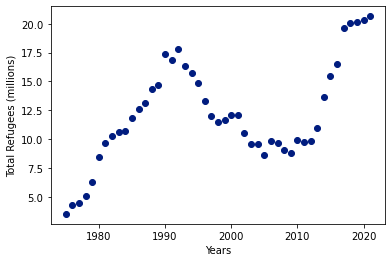

In [289]:
refugees_by_year_df = refugees_df.groupby(by="Year").sum()
refugees_by_year_df = refugees_by_year_df.reset_index()
plt.scatter(refugees_by_year_df["Year"], refugees_by_year_df["Refugees"]/1000000)
plt.ylabel("Total Refugees (millions)")
plt.xlabel("Years")
plt.show()

<style>
    .md {
        background-color: #42EADDFF;
        color: #000000FF;
    }
</style>
<div class="md">
<ul>
<li>What are the top 5 countries that refugees originated from in any given year? </li>
<li>What are the top 5 countries that refugees migrated to in the same year? </li>
<li>Show both numerical values and percentages.</li>
<ul>
</div>

In [290]:
# Creating a function to get the total number of refugees in a given year
def total_refugees_by_year(yr):
    return refugees_df[refugees_df["Year"] == yr]["Refugees"].sum()


# Creating a function to get the total number of refugees in any year for both Origin countries and Host Countries 
def total_refugees_by_year_and_country(yr, country_type="Origin"):
    total = total_refugees_by_year(yr)
    grouped = refugees_df[refugees_df["Year"] == yr].groupby(by=country_type).sum()
    df = grouped.reset_index()
    df = df.drop(columns=["Year"])
    df["Percentage"] = 100*df["Refugees"]/total
    return df.sort_values(by="Refugees", ascending=False).round({"Percentage":0})




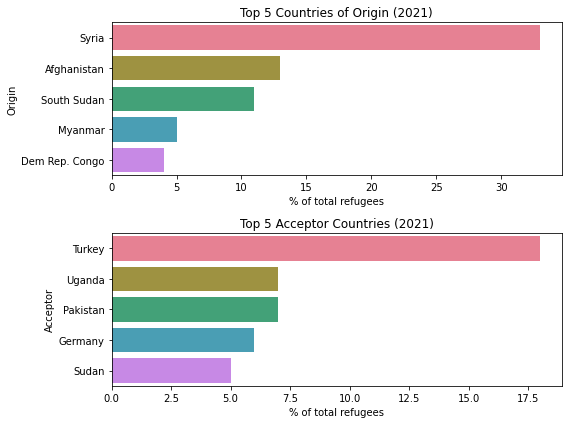

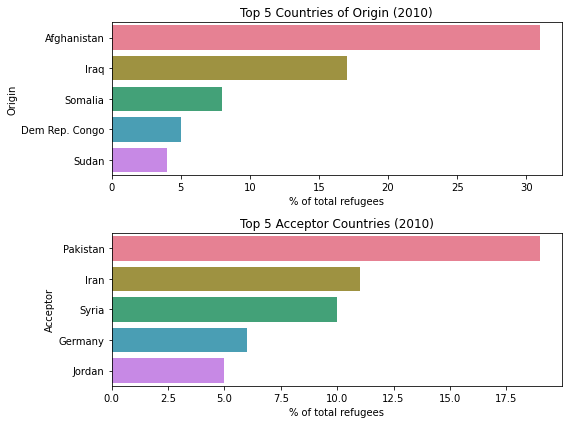

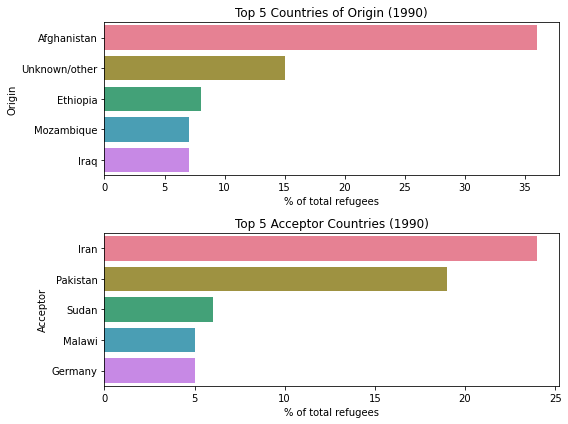

In [292]:
# Make a graph for donors and hosts for any given year
def make_top_donor_host_plot(yr):
    donors = total_refugees_by_year_and_country(yr, "Origin").head()
    hosts = total_refugees_by_year_and_country(yr, "Acceptor").head()
    
    # Generate random color palettes
    donor_palette = sns.color_palette("husl", len(donors))
    host_palette = sns.color_palette("husl", len(hosts))

    # Create a figure and two subplots
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

    # Plot the donors data on the first subplot with a random color palette
    sns.barplot(data=donors, x="Percentage", y="Origin", ax=axes[0], palette=donor_palette)
    axes[0].set_title(f"Top 5 Countries of Origin ({yr})")
    axes[0].set_xlabel("% of total refugees")

    # Plot the hosts data on the second subplot with a random color palette
    sns.barplot(data=hosts, x="Percentage", y="Acceptor", ax=axes[1], palette=host_palette)
    axes[1].set_title(f"Top 5 Acceptor Countries ({yr})")
    axes[1].set_xlabel("% of total refugees")

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

make_top_donor_host_plot(2021)
make_top_donor_host_plot(2010)
make_top_donor_host_plot(1990)


<style>
    .md {
        background-color: #42EADDFF;
        color: #000000FF;
    }
</style>
<div class="md">
<ul>
<li>Create a function to show the refugee acceptance history of any country</li>
<li>Show both numerical values and percentages</li>
</ul>
</div>


In [293]:
def refugee_acceptance_history(country, years=[]):

    df = refugees_df[refugees_df["Acceptor"]==country].groupby(by="Year").sum()
    df.reset_index(inplace=True)
    if years:
        [st, end] = years
        df= df.query(f'Year >= {st} & Year <= {end}')

    # Create a copy of the DataFrame to avoid the SettingWithCopyWarning
    df = df.copy()
    df["Total Refugees"] = df["Year"].apply(total_refugees_by_year)
    df["Percentage"] = 100*df["Refugees"]/df["Total Refugees"]
    return df

In [294]:
# Create a function to genrate plots for any country 

def make_refugee_acceptance_plot(country, years=[]):
    df = refugee_acceptance_history(country, years=years)
    if df.empty:
        print(f'No Data available for {country} in {yr}')
        return


    # Create a 1x2 grid for subplots (2 row, 1 columns)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # Setting figsize to 10, 12

    # Scatter plot for Percentage
    ax2.scatter(df["Year"], df["Percentage"], label="Percentage", marker="o", color="blue")
    ax2.set_xlabel("Year")
    ax2.set_ylabel("Percentage")
    ax2.set_title("Percentage of Total Refugees Accepted: "+country)
    ax2.grid(True)  # Add a grid
    ax2.legend()

    # Scatter plot for Refugees
    ax1.scatter(df["Year"], df["Refugees"], label="Refugees", marker="x", color="red")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Refugees")
    ax1.set_title("Number of Total Refugees Accepted: "+country)
    ax1.grid(True)  # Add a grid
    ax1.legend()

    # Adjust the layout to avoid overlapping labels
    plt.tight_layout()

    # Show the plot
    plt.show()

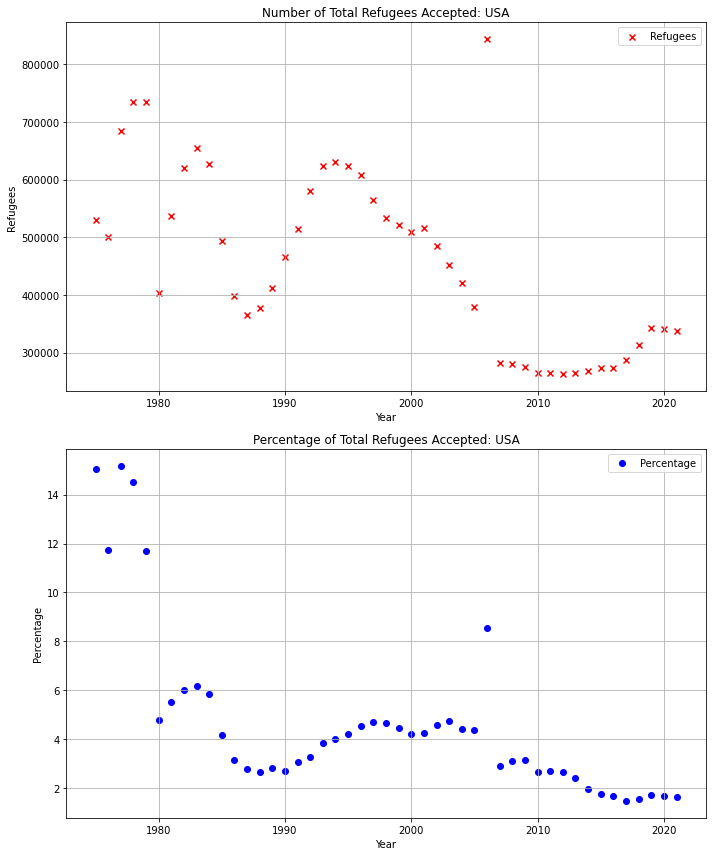

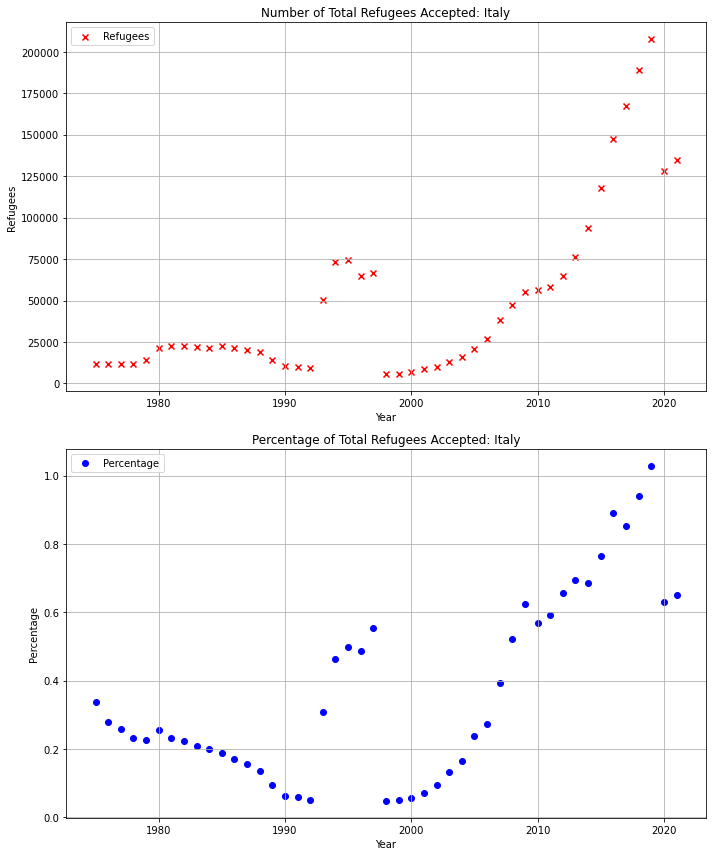

In [296]:
make_refugee_acceptance_plot("USA")
make_refugee_acceptance_plot('Italy')


<style>
    .md {
        background-color: #42EADDFF;
        color: #000000FF;
    }
</style>
<div class="md">
<ul>
<li>Create a function to show the top 5 countries of origin for refugees accepted by any country in a given year</li>
<li>Display these on a bar plot</li>
</ul>
</div>

In [237]:
import random
yr =2021
def make_refugee_origins_plot(country, yr):
    df= refugees_df[(refugees_df["Acceptor"]==country) & (refugees_df["Year"] == yr) ]
    if df.empty:
          print(f'No Data available for {country} in {yr}')
          return
    total = refugees_df[(refugees_df["Acceptor"]==country) & (refugees_df["Year"] == yr) ]["Refugees"].sum()
    df = df.sort_values(by="Refugees",ascending=False)
    df = df.head()
    df["Percentage"] = 100*df["Refugees"]/total
    df["Percentage"] = df["Percentage"].round(2)
    palettes = ["deep", "pastel", "colorblind", "dark", "muted"]
    sns.set_palette(random.choice(palettes))
    ax = sns.barplot(data=df, x="Percentage", y="Origin")
    ax.set_xlabel("% of total accepted")
    plt.title(f"Top 5 Origin Countries for Refugees in {country} ({yr})")
    plt.text(0.85, 0.05, f"Total accepted: {total}", transform=ax.transAxes,
         fontsize=10, color='black', va='bottom', ha='right', bbox=dict(facecolor='white', alpha=0.5))
    plt.show()



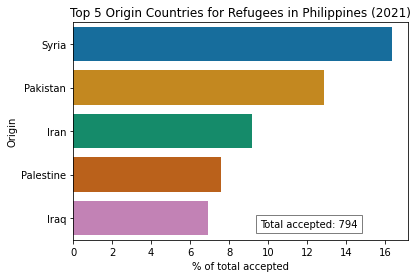

In [298]:
country = "Philippines"
yr = 2021
make_refugee_origins_plot(country, yr)
# df= refugees_df[(refugees_df["Acceptor"]==country) & (refugees_df["Year"] == yr) ]